In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Datos de ejemplo para cada DataFrame
df_estudiantes = pd.DataFrame({
    'cedula': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'nombre': ['Romina', 'Romina', 'Romina', 'Evelin', 'Evelin', 'Evelin', 'Jhon', 'Jhon', 'Jhon'],
    'asignatura': ['Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina'],
    'nota_final': [85, 90, 88, 80, 75, 85, 90, 95, 92]
})

df_diagnostico = pd.DataFrame({
    'cedula': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'nombre': ['Romina', 'Romina', 'Romina', 'Evelin', 'Evelin', 'Evelin', 'Jhon', 'Jhon', 'Jhon'],
    'asignatura': ['Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina'],
    'nota_diagnostico': [80, 85, 87, 78, 82, 80, 85, 90, 88]
})

df_interciclo = pd.DataFrame({
    'cedula': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'nombre': ['Romina', 'Romina', 'Romina', 'Evelin', 'Evelin', 'Evelin', 'Jhon', 'Jhon', 'Jhon'],
    'asignatura': ['Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina'],
    'nota_interciclo': [88, 92, 89, 84, 88, 82, 90, 93, 91]
})

df_final = pd.DataFrame({
    'cedula': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'nombre': ['Romina', 'Romina', 'Romina', 'Evelin', 'Evelin', 'Evelin', 'Jhon', 'Jhon', 'Jhon'],
    'asignatura': ['Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje de Máquina'],
    'nota_final2': [90, 93, 91, 85, 88, 84, 92, 94, 90]
})

In [ ]:
# Realiza las uniones
df_combined = df_estudiantes \
    .merge(df_diagnostico, on=['cedula', 'nombre', 'asignatura'], how='left') \
    .merge(df_interciclo, on=['cedula', 'nombre', 'asignatura'], how='left') \
    .merge(df_final, on=['cedula', 'nombre', 'asignatura'], how='left')

In [ ]:
# Mostrar el DataFrame combinado
print("DataFrame combinado:")
print(df_combined)

DataFrame combinado:
   cedula  nombre              asignatura  nota_final  nota_diagnostico  \
0       1  Romina          Emprendimiento          85                80   
1       1  Romina        Minería de Datos          90                85   
2       1  Romina  Aprendizaje de Máquina          88                87   
3       2  Evelin          Emprendimiento          80                78   
4       2  Evelin        Minería de Datos          75                82   
5       2  Evelin  Aprendizaje de Máquina          85                80   
6       3    Jhon          Emprendimiento          90                85   
7       3    Jhon        Minería de Datos          95                90   
8       3    Jhon  Aprendizaje de Máquina          92                88   

   nota_interciclo  nota_final2  
0               88           90  
1               92           93  
2               89           91  
3               84           85  
4               88           88  
5               82      

In [ ]:
# Preparar los datos para el modelo
X = df_combined[['nota_final', 'nota_diagnostico', 'nota_interciclo']]
y = df_combined['nota_final2']

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("\nEvaluación del modelo de regresión:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")


Evaluación del modelo de regresión:
Error Cuadrático Medio (MSE): 2.36


In [ ]:
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print("\nEvaluación del modelo de regresión:")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")


Evaluación del modelo de regresión:
Error Absoluto Medio (MAE): 1.21


In [ ]:
# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
print("\nEvaluación del modelo de regresión:")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


Evaluación del modelo de regresión:
Coeficiente de Determinación (R²): -0.52


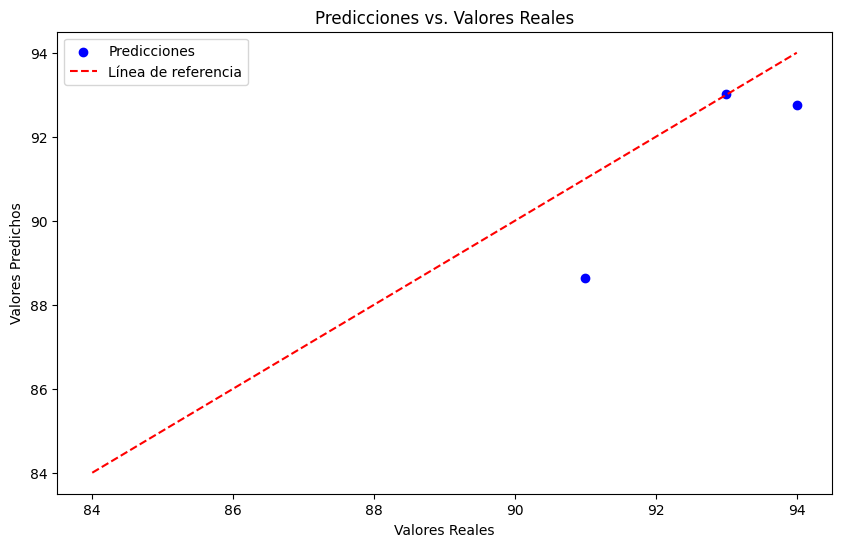

In [ ]:
# Visualizar las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()

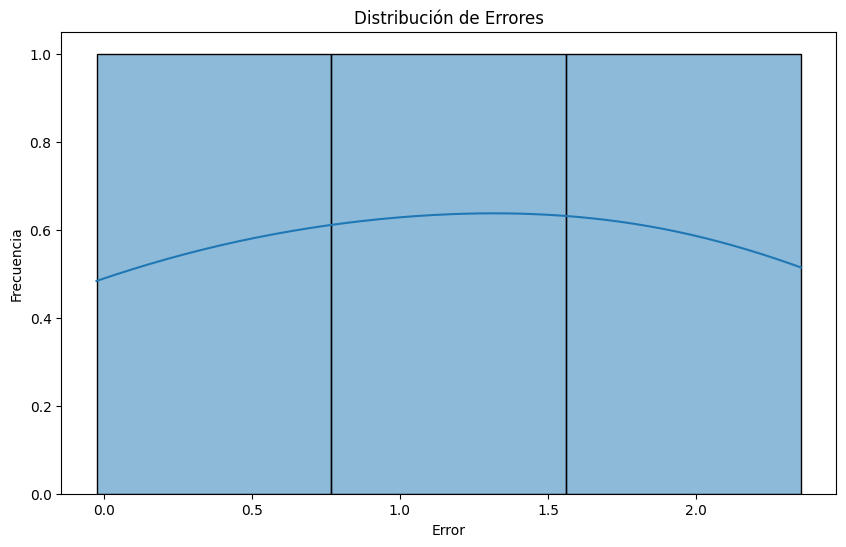

In [ ]:
# Visualizar la distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.show()

## **Conclusion:**

En esta práctica, se desarrolló y evaluó un modelo de regresión lineal utilizando datos ficticios de estudiantes, con el objetivo de predecir sus calificaciones finales basándose en tres variables predictoras: las notas de los exámenes de diagnóstico, interciclo y final. Los resultados obtenidos del modelo se evaluaron utilizando tres métricas: Error Cuadrático Medio (MSE), Error Absoluto Medio (MAE) y Coeficiente de Determinación (R²).

Autoevaluación
1. ¿Qué métrica mide el promedio de los cuadrados de los errores en las predicciones del modelo?<br>
A) Error Absoluto Medio (MAE)
<u><b>B) Error Cuadrático Medio (MSE)</b></u>
C) Coeficiente de Determinación (R²)
D) Error de Predicción

2. ¿Cuál es la interpretación de un valor bajo de MAE?<br>
A) El modelo es poco preciso en promedio.
B) El modelo tiene errores grandes en las predicciones.
<u><b>C) El modelo es preciso en promedio.</b></u>
D) El modelo explica muy bien la varianza en los datos.

3. ¿Qué indica un valor de R² igual a 1?<br>
A) El modelo no explica nada de la varianza en los datos.
B) El modelo tiene errores muy altos en las predicciones.
<u><b>C) El modelo explica perfectamente la varianza en los datos.</b></u>
D) El modelo tiene errores bajos, pero no explica bien los datos.

4. ¿Cuál es el propósito de dividir los datos en conjuntos de entrenamiento y prueba?<br>
<u><b>A) Para evaluar el rendimiento del modelo en datos no vistos.</b></u>
B) Para aumentar el tamaño del conjunto de datos.
C) Para realizar una normalización de datos.
D) Para combinar datos de diferentes fuentes.

5. En la visualización de 'Predicciones vs. Valores Reales', ¿qué representa la línea de referencia?<br>
A) La línea de tendencia de los datos.
<u><b>B) La media de los valores reales.</b></u>
C) La línea donde las predicciones serían perfectas.
D) La desviación estándar de los errores.

6. ¿Qué información proporciona el histograma de errores??<br>
A) La distribución de los valores reales en el conjunto de datos.
B) La relación entre las predicciones y los valores reales.
<u><b>C) La distribución de las diferencias entre valores reales y predicciones.</b></u>
D) La precisión del modelo en datos de entrenamiento.

7. ¿Qué métrica es menos sensible a errores grandes y proporciona un promedio simple de las diferencias absolutas?<br>
A) Error Cuadrático Medio (MSE)
<u><b>B) Error Absoluto Medio (MAE).</b></u>
C) Coeficiente de Determinación (R²)
D) Error de Predicción

8. ¿Cuál es la función principal de la biblioteca sklearn en el notebook?<br>
A) Crear gráficos y visualizaciones.
B) Preprocesar los datos.
<u><b>C) Construir y evaluar modelos predictivos.</b></u>
D) Leer y escribir archivos CSV.

9. ¿Qué función se utiliza para calcular el Error Cuadrático Medio en Python?<br>
A) mean_absolute_error()
B) r2_score()
<u><b>C) mean_squared_error()</b></u>
D) accuracy_score()

10. ¿Qué se está intentando predecir en el modelo de regresión lineal?<br>
A) nota_final
B) nota_diagnostico
C) nota_interciclo
<u><b>D) nota_final2</b></u>